In [1]:
from coupled_dipole_model import DipoleParameters
from coupled_dipole_model import CalculateCrossSections
import numpy as np
import matplotlib.pyplot as plt
hbar_eVs = 6.58212E-16 # Planck's constant [eV*s]

def plot_analytics(which, drive):
    """This function plots the individual particle and total cross-sections.
    
    which -- which observable to plot (takes 'ext', 'sca', or 'abs')
    drive -- polarization of light (e.g. x polarized = np.array([1, 0, 0]) )
    """
    w = np.arange(.5,3,.005)/hbar_eVs
    Pext = np.zeros((num, len(w)))
    Psca = np.zeros((num, len(w)))
    Pabs = np.zeros((num, len(w)))
    for i in range(0,len(w)):
        Pext[:,i], Psca[:,i], Pabs[:,i] = calc_dips.cross_sects(w=w[i], drive=drive)
    if which == 'ext': P = Pext
    if which == 'sca': P = Psca
    if which == 'abs': P = Pabs
#     for i in range(0, num):
#         plt.plot(w*hbar_eVs, P[i,:], label=str('particle ')+str(i+1))
    plt.plot(w*hbar_eVs, np.sum(P, axis=0), '--',label='analytics')

## Example for a rotated prolate spheroid monomer

In [2]:
num = 1 # number of particles 
def make_mono_input(N, shortaxis, longaxis, angle):
    def_centers = np.zeros((N, 3)) # center of prolate spheroid
    def_orient = np.zeros(N) # angle between z axis, and long axis spheroid
    def_all_radii = np.zeros((N, 2)) # radii of spheroid, (long, short)
    def_orient[0] = angle
    def_all_radii[0, :] = np.array([longaxis, shortaxis])*1.E-7
    return def_centers, def_orient, def_all_radii

def_centers, def_orients, def_all_radii = make_mono_input(N=num, 
                                                     shortaxis=10, # nm
                                                     longaxis=30, # nm
                                                     angle= 0.0# 30*(np.pi/180) # radian
                                                    )

calc_dips = CalculateCrossSections(centers=def_centers, 
                                   orient=def_orients,
                                   all_radii=def_all_radii,
                                   num=num,
                                   n=1.47, 
                                   wp=8.959/hbar_eVs, 
                                   eps_inf=9.695, 
                                   gam_drude=0.073/hbar_eVs
                                  )

# plot_analytics(which='abs', drive=np.array([0, 0, 1]))
# plt.xlim([1.5, 3.0])
# plt.xlabel('Energy [eV]')
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.ylabel('Abs. Cross-section [$\mu$m$^2$]')
# plt.tight_layout()
# plt.legend(frameon=False,loc='upper left')
# plt.show()

## Inputs for a Dimer

In [3]:
# num = 2
# def make_dimer_input(N, shortaxis1, shortaxis2, longaxis1, longaxis2, angle1, angle2, gapy, gapz):
#     if gapz == 0: whichgap = 'y'; gaplen=gapy
#     if gapy == 0: whichgap = 'z'; gaplen=gapz

#     def_centers = np.zeros((N, 3))
#     def_orient = np.zeros(N)
#     def_all_radii = np.zeros((N, 2))

#     if whichgap == 'z':
#         def_centers[0,:] = np.array([ 0, 0, -gapz/2 ])*1.E-7
#         def_centers[1,:] = np.array([ 0,  0, gapz/2 ])*1.E-7
#     if whichgap == 'y':
#         def_centers[0,:] = np.array([ 0, -gapy/2, 0 ])*1.E-7
#         def_centers[1,:] = np.array([ 0,  gapy/2, 0 ])*1.E-7

#     def_orient[0] = angle1
#     def_orient[1] = angle2

#     def_all_radii[0, :] = np.array([longaxis1, shortaxis1])*1.E-7
#     def_all_radii[1, :] = np.array([longaxis2, shortaxis2])*1.E-7
#     return def_centers, def_orient, def_all_radii

# def_centers, def_orients, def_all_radii = make_dimer_input(N=num,
#                                                           shortaxis1=30,
#                                                           longaxis1=60,
#                                                           shortaxis2=30,
#                                                           longaxis2=70, 
#                                                           angle1=0, 
#                                                           angle2=0,
#                                                           gapy=0, 
#                                                           gapz=100)

# calc_dips = CalculateCrossSections(centers=def_centers, 
#                                    orient=def_orients,
#                                    all_radii=def_all_radii,
#                                    num=num,
#                                    n=1.0, 
#                                    wp=8.959/hbar_eVs, 
#                                    eps_inf=9.695, 
#                                    gam_drude=0.073/hbar_eVs)


# plot_analytics(which='abs', drive=np.array([0, 0, 1]))
# plt.xlim([1.0, 3.0])
# plt.xlabel('Energy [eV]')
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# plt.ylabel('Abs. Cross-section [$\mu$m$^2$]')
# plt.tight_layout()
# plt.legend(frameon=False,loc='upper right')
# plt.show()

## Verify Against Simulation

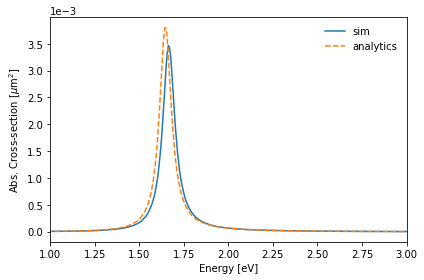

In [5]:
def plot_simulation(filename, labelname, linetype):
    data = np.loadtxt(filename,skiprows=1)
    energy = data[:,0]
    ext_cross = data[:,1]
    abs_cross = data[:,2]
    sca_cross = data[:,3]
    plt.plot(energy, abs_cross, linetype, label=labelname)


name = str('../check_with_simulation/simulated_spectra/single_ellipsoid/Spectrum_10_30_n1.47')
plot_simulation(filename=name, linetype='', labelname='sim')

plot_analytics(which='abs', drive=np.array([0, 0, 1]))

plt.xlim([1.0, 3.0])
plt.xlabel('Energy [eV]')
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel('Abs. Cross-section [$\mu$m$^2$]')
plt.tight_layout()
plt.legend(frameon=False,loc='upper right')
plt.show()